## Chapter 8 - Dimensionality Reduction

### Explained Variance Ratio

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

import matplotlib.pyplot as plt

def load(fname):
    import pickle
    mnist = None
    try:
        with open(fname, 'rb') as f:
            mnist = pickle.load(f)
            return mnist
    except FileNotFoundError:
        from sklearn.datasets import fetch_openml
        mnist = fetch_openml('mnist_784', version=1, cache=True)
        with open(fname, 'wb') as f:
            mnist = pickle.dump(mnist, f)
        return mnist

In [2]:
# Ingest
mnsit = load('mnist.data.pkl')
X, y = mnsit['data'], mnsit['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [3]:
pca = PCA(n_components=14**2)
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=196, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
# Check the variance ratios of top 20 components
print(pca.explained_variance_ratio_[:50])
print(sum(pca.explained_variance_ratio_[:50]))

[0.09709966 0.07158512 0.06055769 0.05291999 0.05074701 0.04301469
 0.0324475  0.02917122 0.02801288 0.02465777 0.02090299 0.02077658
 0.01746874 0.0172588  0.01572802 0.0152113  0.01325329 0.0127535
 0.01179923 0.01136469 0.01065885 0.01045287 0.00980941 0.00923684
 0.00869312 0.00831781 0.0082039  0.00770345 0.00709531 0.00688854
 0.00660792 0.00638328 0.00605638 0.00585229 0.00556135 0.00538028
 0.00520016 0.00497553 0.00482549 0.00467956 0.00457524 0.0044043
 0.0041529  0.00390554 0.00378024 0.00368948 0.00356422 0.00353742
 0.0033839  0.00331331]
0.8276195443583743


In [5]:
# Choosing the right number of dimensions using 95% explanation
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum[:50])
d = np.argmax(cumsum>0.95)+1
print(d)

[0.09709966 0.16868478 0.22924247 0.28216246 0.33290948 0.37592416
 0.40837166 0.43754289 0.46555577 0.49021354 0.51111653 0.53189311
 0.54936185 0.56662065 0.58234867 0.59755997 0.61081325 0.62356675
 0.63536598 0.64673067 0.65738952 0.66784239 0.6776518  0.68688864
 0.69558176 0.70389957 0.71210346 0.71980691 0.72690222 0.73379076
 0.74039867 0.74678195 0.75283834 0.75869063 0.76425198 0.76963226
 0.77483242 0.77980795 0.78463344 0.789313   0.79388824 0.79829254
 0.80244544 0.80635098 0.81013122 0.8138207  0.81738492 0.82092234
 0.82430624 0.82761954]
147


In [6]:
# Fitting now with 95% explained variance from earlier.
pca2 = PCA(n_components=0.95)
pca2.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# Gets the same result
print(len(pca2.components_))

147


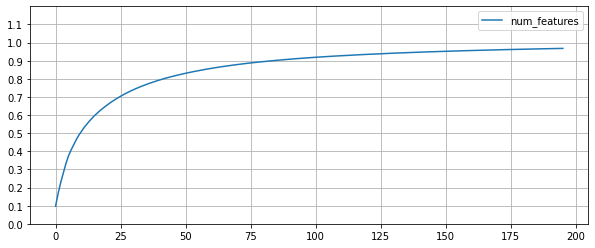

In [8]:
# Or use the elbow curve to help determine the no. of dimensions to use.
fig, ax = plt.subplots(figsize=(18,10))
pd.DataFrame({'num_features' : cumsum}).plot(kind='line', y='num_features', figsize=(10,4), ax=ax)
ax.set_ylim(0,1.2)
ax.set_yticks([i/10 for i in range(0,12)])
ax.grid()
plt.show()

### Incremental PCA

Instead of fitting the whole training set for the SVD algorithm to run, we can split the training set to mini-batches and run incremental PCA (IPCA), one batch at a time.

In [9]:
# Incremental PCA
n_batches = 100
incpca = IncrementalPCA(n_components=10)
for X_batch in np.array_split(X_test, n_batches):
    incpca.partial_fit(X_batch)

In [10]:
# Transform using the projection learnt after the incremental PCA
X_proj3 = incpca.transform(X_test)

### Randomised PCA

Another option for PCA is randomised PCA. This is a stochastic algorithm that quickly finds an approximation of the first $m$ principal components. It is faster when the number of principal components $m$ is much smaller than the number of observations $n$.

In [11]:
# Randomised PCA
rnd_pca = PCA(n_components=10, svd_solver='randomized')

In [12]:
# Transformation after using the projection learnt
X_proj4 = rnd_pca.fit_transform(X_test)